# Hausaufgabe 3 &ndash; Normal Edition
## "Malen nach Zahlen"
<!-- Lizensiert unter (CC BY 4.0), Gert Herold -->

Um das Strömungsfeld um einen kreisförmigen Zylinder mit einem Durchmesser von 7,5 mm besser zu verstehen, wurden [CFD-Simulationen](https://de.wikipedia.org/wiki/Numerische_Str%C3%B6mungsmechanik) durchgeführt. 
Die Berechnungen wurden auf einem unregelmäßigen 2D-Gitter durchgeführt, das den Zylinder durchschneidet, so dass er darin als Kreis erscheint. 
Die Ergebnisse für einen diskreten Zeitpunkt wurden als [CSV-Datei](https://de.wikipedia.org/wiki/CSV_(Dateiformat)) exportiert.

**Die gesamte Programmierung für diese Aufgabe kann ohne if-Anweisungen oder Schleifen durchgeführt werden! Es ist okay, wenn Sie diese zunächst für eine erste Lösung benötigen, aber versuchen Sie, eine Variante zu finden, die diese Strukturen nicht benötigt und stattdessen die Funktionalitäten von Numpy nutzt.**

### 1) Gitterparameter

**1.1) Laden Sie die Daten aus der Datei `U_xyplane.csv` und entpacken Sie den Inhalt der Spalten in neue Variablen (1D-Arrays) u, v, w, x, y, z. Für wie viele Punkte liegen Daten vor?**

_Hinweise: Die Zeilen eines Arrays `A` mit 2 Zeilen lassen sich z.B. so "entpacken": `a,b = A`. Alle Werte sind in SI-Einheiten gegeben (m und m/s). Geschwindigkeitskomponenten werden in der Datei mit "U" bezeichnet, Koordinaten mit "Points"._

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

------------------------------------------------------------------
Lösung:  

- Die Daten aus der Datei U_xyplane.csv laden

In [2]:
X = np.genfromtxt('U_xyplane.csv',  delimiter=',',skip_header=1)

- erste 3 Daten und die Form des Arrays zeigen:

In [3]:
X[:3,:], X.shape

(array([[ 3.67028e+01, -6.65332e-04,  8.07636e-03, -1.79253e-03,
          7.80000e-02,  9.00000e-02],
        [ 3.67027e+01, -1.45445e-03,  4.04941e-03, -4.00000e-03,
          7.80000e-02,  9.00000e-02],
        [ 3.67032e+01, -1.58362e-03,  8.00659e-03, -1.79273e-03,
          8.02124e-02,  9.00000e-02]]),
 (35267, 6))

- den Inhalt der Spalten in neue Variablen u,v,w,x,y,z entpacken

In [4]:
u,v,w,x,y,z = X.T

In [5]:
print(f'u: {u}')
print(f'v: {v}')
print(f'w: {w}')
print(f'x: {x}')
print(f'y: {y}')
print(f'z: {z}')

u: [36.7028 36.7027 36.7032 ... 44.96   44.5054 43.733 ]
v: [-6.65332e-04 -1.45445e-03 -1.58362e-03 ...  7.59926e+00  8.03618e+00
  8.29009e+00]
w: [0.00807636 0.00404941 0.00800659 ... 3.37523    2.88212    2.30128   ]
x: [-0.00179253 -0.004      -0.00179273 ...  0.0647548   0.064429
  0.0640793 ]
y: [0.078     0.078     0.0802124 ... 0.15719   0.157339  0.157265 ]
z: [0.09 0.09 0.09 ... 0.09 0.09 0.09]


- die Punkte der Daten zählen

In [6]:
print(f'Für {X.shape[0]} Punkte liegen Daten vor.')

Für 35267 Punkte liegen Daten vor.


-----------------------------------------------------------------  



Um eine grobe Vorstellung vom Setup zu bekommen, wäre es schön, einen schnellen Überblick über den Simulationsbereich einschließlich des "Zylinderkreises" zu haben.

**1.2) Bestimmen Sie die minimalen und maximalen x- und y-Werte und zeichnen Sie ein Rechteck, das die betrachtete Fläche abdeckt und einen Kreis mit (x, y) = (0.06 m, 0.15 m) und einem Durchmesser von 7.5 mm umgibt.**

  * Schreiben Sie eine Funktion, die die x- und y-Ausdehnung übergeben wird und die mit dem Befehl [_plot()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) eine  Rechteckumrandung zeichnet.

Einen Kreis in eine bestehende Abbildung einzufügen ist z.B. so möglich:
```python
    plt.gca().add_patch(Circle((x_center, y_center), radius, color='k'))
```

--------------

Lösung:  
- die minimalen und maximalen x- und y-Werte bestimmen

In [7]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
print(' xmin:{:>6.3f}\n xmax:{:>6.3f}\n ymin:{:>6.3f}\n ymax:{:>6.3f}'.format(xmin,xmax,ymin,ymax))

 xmin:-0.004
 xmax: 0.220
 ymin: 0.078
 ymax: 0.222


- die Daten des Kreises bestimmen

In [8]:
# Kreis
kreis_durchmesser = 7.5 / 1000 # 0.0075m
kreis_radius = kreis_durchmesser / 2 # 0.00375m

#kreis_center = np.array([0.06,0.15]) # m
kreis_center = (0.06,0.15)

kreis_xmin = kreis_center[0] - kreis_radius
kreis_xmax = kreis_center[0] + kreis_radius
kreis_ymin = kreis_center[1] - kreis_radius
kreis_ymax = kreis_center[1] + kreis_radius

In [9]:
def plot_kreis(col='b'):
    plt.gca().add_patch(Circle(kreis_center, kreis_radius, color=col))

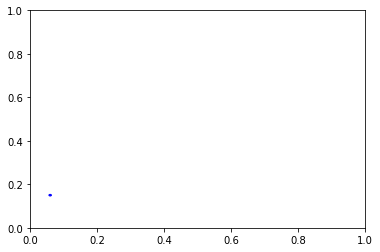

In [10]:
plot_kreis()

In [11]:
kreis_xmin,kreis_xmax,kreis_ymin,kreis_ymax

(0.056249999999999994, 0.06375, 0.14625, 0.15375)

In [12]:
# Breite und Höhe des Schnittes
rechteck_breite = np.abs(rechteck_xmax-rechteck_xmin)
rechteck_hoehe = np.abs(rechteck_ymax-rechteck_ymin)

NameError: name 'rechteck_xmax' is not defined

- die Funktion "rechteck", die die x- und y-Ausdehnung übergeben wird und die mit dem Befehl plot() eine Rechteckumrandung zeichnet

In [ ]:
def rechteck(xmin,xmax,ymin,ymax):
    
    # compare max values with kreis values
    rechteck_xmax = np.maximum(kreis_xmax, xmax) 
    rechteck_xmin = np.minimum(kreis_xmin, xmin)
    rechteck_ymax = np.maximum(kreis_ymax, ymax)
    rechteck_ymin = np.minimum(kreis_ymin, ymin)
    
    
    # plotgröße: index, (Breite, Höhe) in Zoll
    plt.figure(1,(10,6)) # num=1, figsize=(10,6)
    
    # mit dem Befehl plot() eine Rechteckumrandung zeichnen
    plt.plot([rechteck_xmin, rechteck_xmax, rechteck_xmax, rechteck_xmin, rechteck_xmin],
             [rechteck_ymin, rechteck_ymin, rechteck_ymax, rechteck_ymax, rechteck_ymin], color="green")

    # Kreis plotten ...
    plot_kreis()
    #plt.gca().add_patch(Circle(kreis_center, kreis_radius, color='b'))
    #c = patches.Circle(xy=(0.06, 0.15), radius=kreis_radius, fc='g', ec='r')
    #ax.add_patch(c)

    # Achsenbbeschriftungen hinzufügen
    #plt.grid()
    plt.xlabel('x [m]')
    plt.ylabel('y [m]',rotation=0)
    plt.title('Rechteckumrandung')
    plt.axis('equal')
    plt.show()

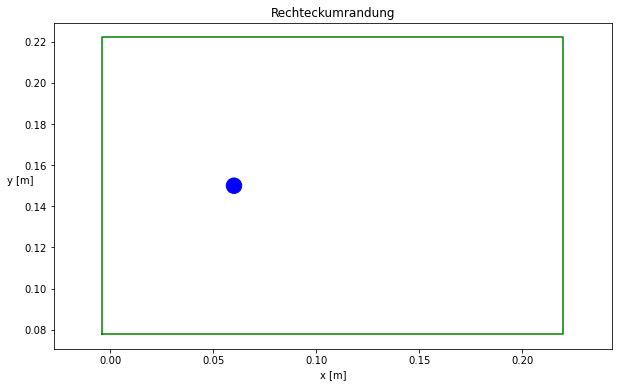

In [ ]:
# example 1
rechteck(xmin,xmax,ymin,ymax)

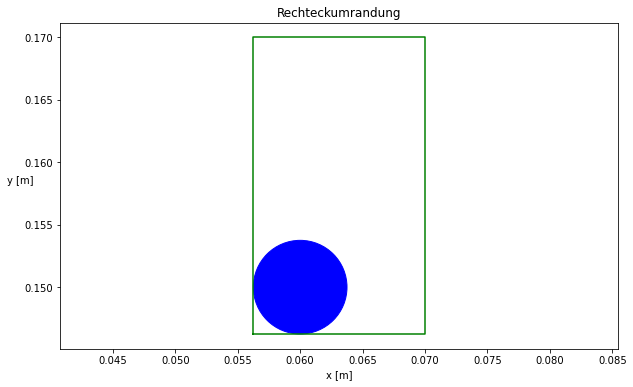

In [ ]:
# example 2
rechteck(0.1,0.07,0.7, 0.17)

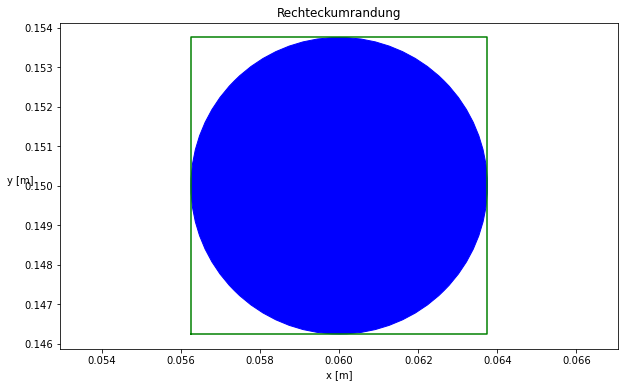

In [ ]:
# example 3
rechteck(0.06, 0.063, 0.148,0.153)

*******************************************************************************

Vor der Auswertung der eigentlichen Daten soll zunächst die Gitterstruktur genauer untersucht werden.

**1.3) Visualisieren Sie das Gitter.**

  * Zeichnen Sie alle Gitterpunkte in einem 20x13-Zoll-Plot unter Verwendung von `'.'`-Markern (kleine Punkte) mit einer Größe von 0.5.
  * Bestimmen Sie den Teilbereich des Gitters, der nur Punkte mit $5.9\,$cm $< x < 6.1\,$cm and $y > 15\,$cm enthält. 
  * Wie viele Punkte liegen in diesem Bereich?
  * Zeichnen Sie die entsprechenden Gitterpunkte mit einer anderen Farbe in die ursprüngliche Abbildung ein.

_Hinweis: Um mehrere boolesche Ausdrücke in Arrays zu kombinieren, können die [bitweisen Operatoren](https://wiki.python.org/moin/BitwiseOperators) `&` (und) sowie `|` (oder) verwendet werden._

--------------------------------------------------------------------------------------
Lösung:   
- alle Gitterpunkte in einem 20x13-Zoll-Plot unter Verwendung von '.'-Markern mit einer Größe von 0.5 zeichnen

In [ ]:
# alle Gitterpunkte in einem 20x13-Zoll-Plot
def plot_gitter(col):
    plt.figure(figsize=(20,13))

    # unter Verwendung von '.'-Markern mit einer Größe von 0.5
    plt.scatter(x, y, s=0.5, marker=".", color=col) # s: Größe der Punkte

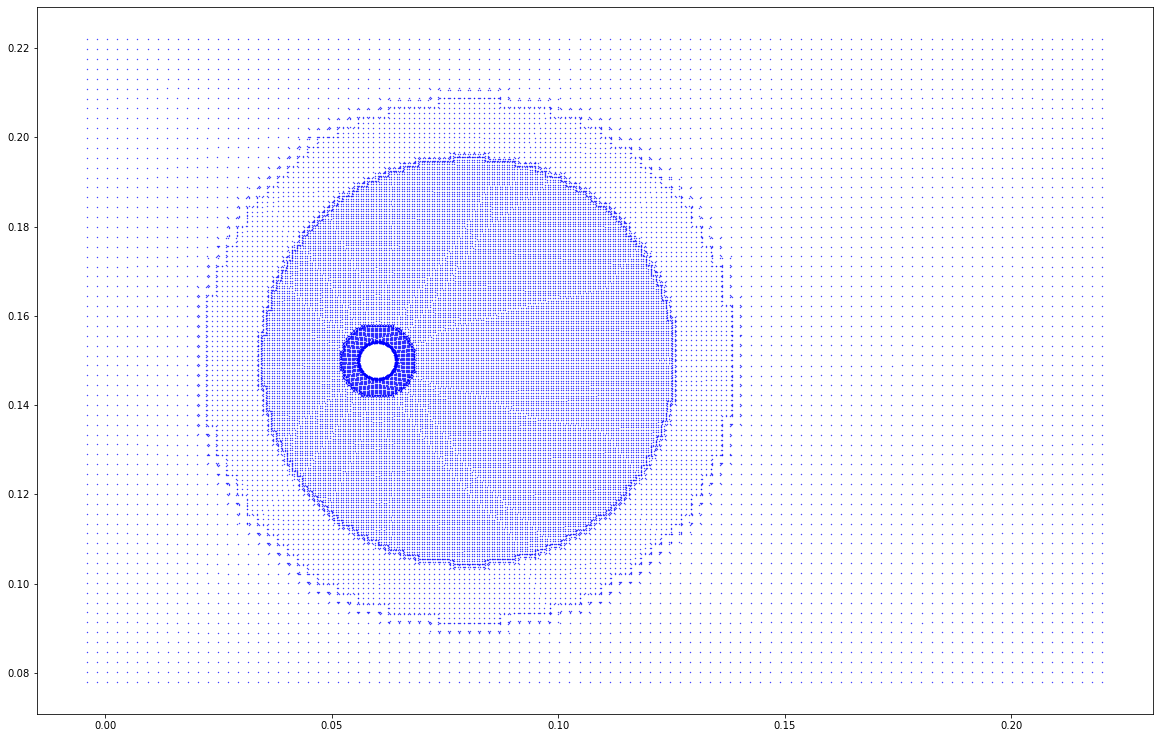

In [ ]:
plot_gitter('b')

- der Teilbereich des Gitters, der nur Punkte mit 5.9cm < 𝑥 < 6.1cm and 𝑦 > 15cm enthält.

In [ ]:
# Teilbereich des Gitters, der nur Punkte mit 5.9cm < 𝑥 < 6.1cm and 𝑦 > 15cm enthält
teil_xmin = 5.9/100 # m
teil_xmax = 6.1/100
teil_ymin = 15/100
teil_ymax = ymax

#rechteck(teil_xmin, teil_xmax, teil_ymin, teil_ymax)

- Anzahl der Punkte, die in diesem Bereich liegen

In [ ]:
# Anzahl der Punkte, die in diesem Bereich liegen
bedingung = (x > teil_xmin) & (x < teil_xmax) & (y > teil_ymin)
print(f'Bedingung: {bedingung}') # Array von Boolean: [False, False,...,True, False..]
print(f'die Form der Bedingung: {bedingung.shape}')

# Anzahl der Punkte in diesem Bereich
Anzahl = np.sum(bedingung)
# np.sum: Addition von Bedingung = True(= 1)  -> Anzahl der Element mit True

print(f'Anzahl der Punkte, die in diesem Bereich liegen: {Anzahl}')
# die entsprechenden Gitterpunkte mit einer anderen Farbe in die ursprüngliche Abbildung einzeichnen

Bedingung: [False False False ... False False False]
die Form der Bedingung: (35267,)
Anzahl der Punkte, die in diesem Bereich liegen: 516


- die entsprechenden Gitterpunkte mit einer anderen Farbe in die ursprüngliche Abbildung einzeichnen:

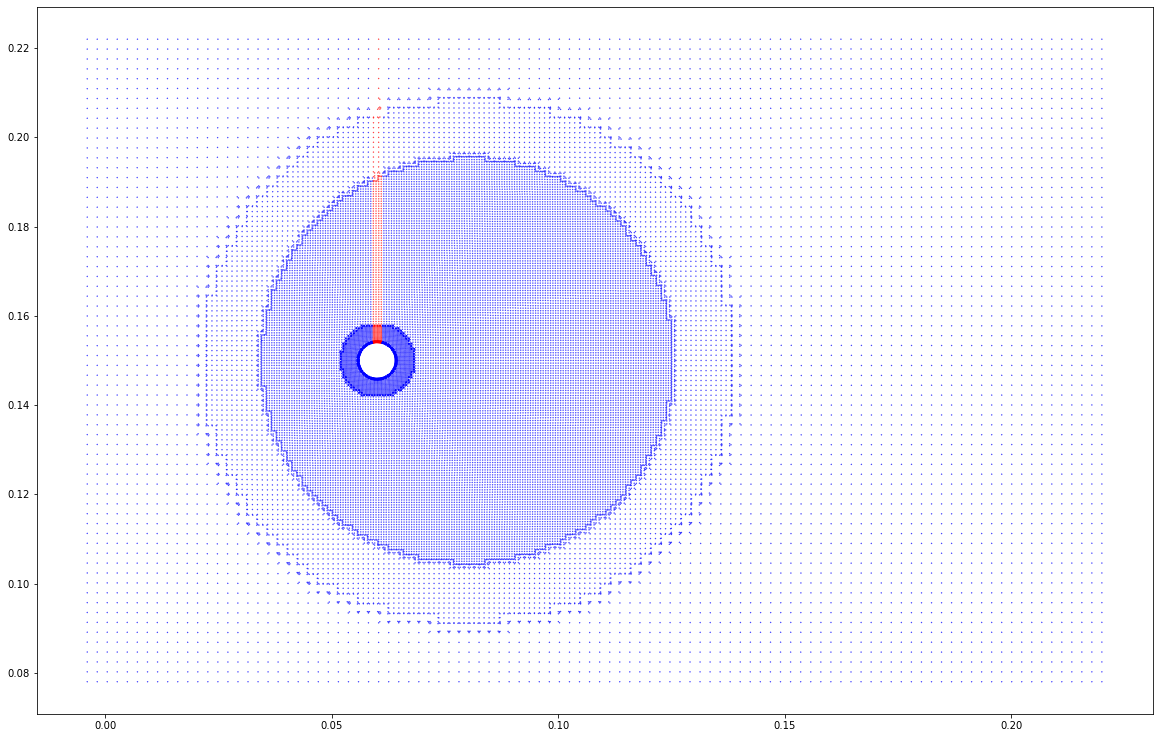

In [ ]:
# die Unterscheidung der Farbe
# Wenn die Punkte im Bedingungsbereich liegen, dann ist die Farbe Rot('r'), sonst Blau('b').
col = np.where(bedingung,'r','b')
plot_gitter(col)

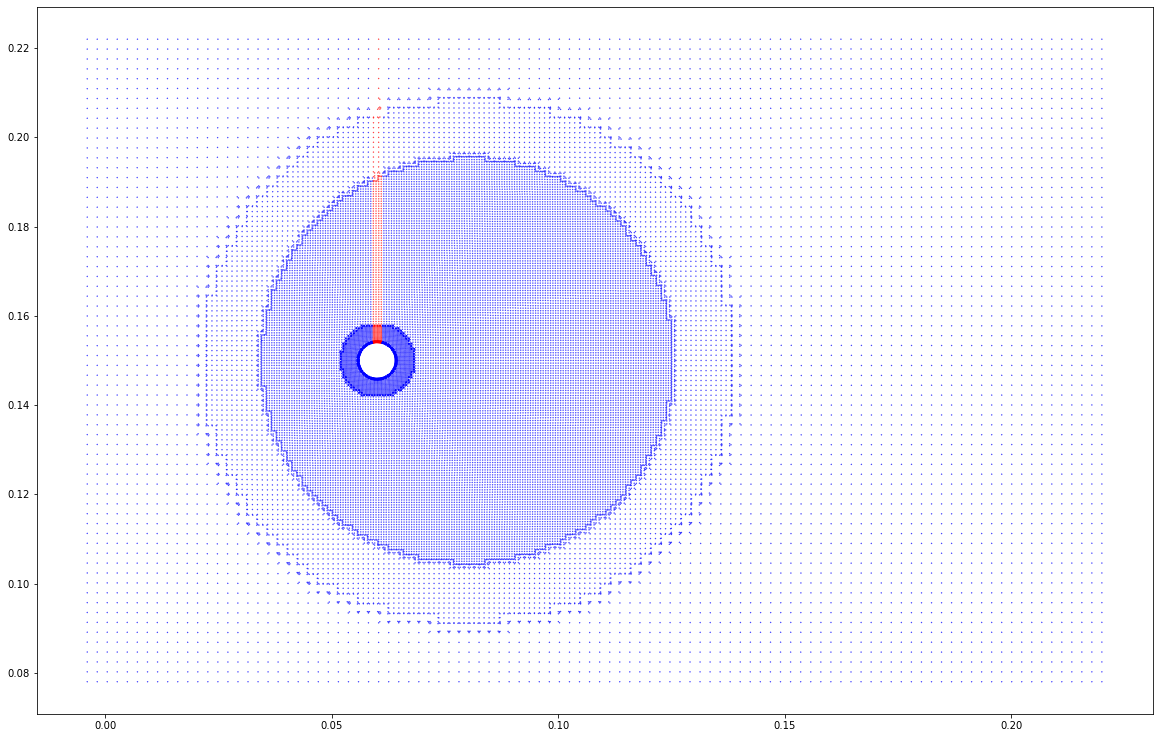

In [ ]:
plt.figure(1,(20,13))

# die Unterscheidung der Farbe
# Wenn die Punkte im Bedingungsbereich liegen, dann ist die Farbe Rot('r'), sonst Blau('b').
col = np.where(bedingung,'r','b')
# col = np.where((x > teil_xmin) & (x < teil_xmax) & (y > teil_ymin),'r','b')

# plot
plt.scatter(x, y, s=0.5, marker=".", color=col)

In [ ]:
# Probieren mit klinen Arrays
x = np.array([1,2,3,4,5])
y = np.array([6,7,8,9,10])
bedingung = (x < 5) & (y > 6)
print(bedingung) #[False True True False False]
np.sum(bedingung) #2

#print(x[bedingung]) #[2 3]
#print(y[bedingung]) #[7 8]
XY = np.vstack((x,y)).T
print(XY) # 

index = np.where(bedingung == 1) # Index array([1,2])
print(x[index]) #element [2,3]
XX,YY = np.meshgrid(index ,index)
print(XX) # [[1 2] [1 2]]
print(YY) # [[1 1] [2 2]]
print(XY[XX])
print(XY[YY])

distances = np.linalg.norm(XY[XX]-XY[YY], axis=2)
print(distances)
np.fill_diagonal(distances, np.nan) # verdoppelten Teil entfernen
np.nanmin(distances) 

[False  True  True  True False]
[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]
[2 3 4]
[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]
[[[2 7]
  [3 8]
  [4 9]]

 [[2 7]
  [3 8]
  [4 9]]

 [[2 7]
  [3 8]
  [4 9]]]
[[[2 7]
  [2 7]
  [2 7]]

 [[3 8]
  [3 8]
  [3 8]]

 [[4 9]
  [4 9]
  [4 9]]]
[[0.         1.41421356 2.82842712]
 [1.41421356 0.         1.41421356]
 [2.82842712 1.41421356 0.        ]]


1.4142135623730951

In [ ]:
a = np.array([2, 7])
b = np.array([3, 8])
u = b - a
np.linalg.norm(u)

1.4142135623730951

-----------------------

**1.4) Berechnen Sie für jeden Punkt im kleineren Teilgitter den Abstand zum nächstliegenden Nachbarpunkt.**

Das ist z.B. möglich, indem die Abstände von allen Punkten zu allen anderen Punkten bestimmt werden und dann für jeden Punkt der jeweils kleinste Abstand (größer 0!) herausgesucht wird.

  * Sortieren Sie die jeweils ermittelten Nachbar-Abstände in aufsteigender Reihenfolge.
  * Erstellen Sie eine Abbildung, die auf der $x$-Achse nur den Punktindex aufträgt und die jeweiligen Nachbar-Abstände auf der logarithmisch skalierten $y$-Achse.

-------------
Lösung:  
- Die Indizes im Bedingungsbereich bestimmen

In [ ]:
index = np.where(bedingung == 1) 

- mit "meshgrid( )" alle Kombinationen der Indexpaaren XX[ i,j ] und YY[ i,j ] bilden.  
Zum Beispiel ist XX[0] =[7716,7717,7718,.......,], Sie sind alle Indizes, in dem die Bedingung erfüllt sind.  
YY[0] = [7716,7716,7716,.......,7716], alle Elemente sind 7716.  
Das heißt, die erste Zeile der beiden Matrizen sind die Kombination vom Index 7716 und aller Indizes.

In [ ]:
XX,YY = np.meshgrid(index,index) #(516,516)

In [ ]:
XX,YY

(array([[ 7716,  7717,  7718, ..., 34347, 35009, 35010],
        [ 7716,  7717,  7718, ..., 34347, 35009, 35010],
        [ 7716,  7717,  7718, ..., 34347, 35009, 35010],
        ...,
        [ 7716,  7717,  7718, ..., 34347, 35009, 35010],
        [ 7716,  7717,  7718, ..., 34347, 35009, 35010],
        [ 7716,  7717,  7718, ..., 34347, 35009, 35010]]),
 array([[ 7716,  7716,  7716, ...,  7716,  7716,  7716],
        [ 7717,  7717,  7717, ...,  7717,  7717,  7717],
        [ 7718,  7718,  7718, ...,  7718,  7718,  7718],
        ...,
        [34347, 34347, 34347, ..., 34347, 34347, 34347],
        [35009, 35009, 35009, ..., 35009, 35009, 35009],
        [35010, 35010, 35010, ..., 35010, 35010, 35010]]))

In [ ]:
index1 = np.arange(5)
index1
CC,DD = np.meshgrid(index1,index1)
CC,DD

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]))

- die Koordinaten (x,y) bilden

In [ ]:
XY = np.vstack((x,y)).T #(35261,2)

In [ ]:
XY, XY.shape

(array([[-0.00179253,  0.078     ],
        [-0.004     ,  0.078     ],
        [-0.00179273,  0.0802124 ],
        ...,
        [ 0.0647548 ,  0.15719   ],
        [ 0.064429  ,  0.157339  ],
        [ 0.0640793 ,  0.157265  ]]),
 (35267, 2))

- Distanzmatrix erstellen  
Die Distanzmatrix ist eine quadratische Matrix, die die Abstände zwischen Punkten angibt.  
Die Abstände werden mit L2-Norm berechnet.

In [ ]:
XY[XX].shape

(516, 516, 2)

In [ ]:
distances = np.linalg.norm(XY[XX]-XY[YY], axis=2) # (516,516) 

In [ ]:
distances, distances.shape

(array([[0.        , 0.00029221, 0.00027502, ..., 0.00214992, 0.03540978,
         0.03606985],
        [0.00029221, 0.        , 0.00039719, ..., 0.00200003, 0.03540471,
         0.03606476],
        [0.00027502, 0.00039719, 0.        , ..., 0.0019254 , 0.03513475,
         0.03579482],
        ...,
        [0.00214992, 0.00200003, 0.0019254 , ..., 0.        , 0.0336279 ,
         0.03428757],
        [0.03540978, 0.03540471, 0.03513475, ..., 0.0336279 , 0.        ,
         0.00066007],
        [0.03606985, 0.03606476, 0.03579482, ..., 0.03428757, 0.00066007,
         0.        ]]),
 (516, 516))

- Die diagonale Elemente sind die Abstände zwischen denselben Punkten und alle sind daher 0.  
die Zeros zum "nan" umschreiben, um die nächstliegenden Punkt zu finden

In [ ]:
np.fill_diagonal(distances, np.nan) # diagonale Elemente 0 -> None

In [ ]:
distances

array([[       nan, 0.00029221, 0.00027502, ..., 0.00214992, 0.03540978,
        0.03606985],
       [0.00029221,        nan, 0.00039719, ..., 0.00200003, 0.03540471,
        0.03606476],
       [0.00027502, 0.00039719,        nan, ..., 0.0019254 , 0.03513475,
        0.03579482],
       ...,
       [0.00214992, 0.00200003, 0.0019254 , ...,        nan, 0.0336279 ,
        0.03428757],
       [0.03540978, 0.03540471, 0.03513475, ..., 0.0336279 ,        nan,
        0.00066007],
       [0.03606985, 0.03606476, 0.03579482, ..., 0.03428757, 0.00066007,
               nan]])

- die jeweils ermittelten Nachbar-Abstände in aufsteigender Reihenfolge sortieren

In [ ]:
dist_sorted_nan = np.sort(distances, axis=0)

In [ ]:
dist_sorted_nan[0], dist_sorted_nan[0].shape

(array([2.74220714e-04, 2.72025164e-04, 2.75000655e-04, 2.74001825e-04,
        3.82899256e-04, 3.86007889e-04, 5.50004400e-04, 5.50000082e-04,
        5.50000227e-04, 5.50000227e-04, 5.50000036e-04, 5.50000082e-04,
        5.50004809e-04, 5.50000445e-04, 5.50000227e-04, 5.50000009e-04,
        5.50000145e-04, 5.50000145e-04, 5.50000036e-04, 5.50000036e-04,
        5.50000082e-04, 5.50000082e-04, 5.50000009e-04, 5.50000009e-04,
        5.50000009e-04, 5.49022768e-04, 5.50000036e-04, 5.50000036e-04,
        5.50000445e-04, 5.50000445e-04, 5.50000082e-04, 5.50000082e-04,
        5.50000445e-04, 5.50000445e-04, 5.50000036e-04, 5.50000082e-04,
        5.50000445e-04, 5.50000445e-04, 5.50000082e-04, 5.50000082e-04,
        5.50000582e-04, 5.50000582e-04, 5.50000082e-04, 5.50000082e-04,
        5.51002323e-04, 5.50002945e-04, 5.50000145e-04, 5.50000582e-04,
        5.50000327e-04, 5.50000327e-04, 5.50000082e-04, 5.50000036e-04,
        5.50000327e-04, 5.50000327e-04, 5.50000036e-04, 5.500000

- letztes Element(-1 = nan) von allen Zeillen entfernen

In [ ]:
dist_sorted = np.delete(dist_sorted_nan, -1,0)

In [ ]:
dist_sorted, dist_sorted.shape

(array([[2.74220714e-04, 2.72025164e-04, 2.75000655e-04, ...,
         5.76000000e-05, 2.05327641e-04, 3.16520394e-04],
        [2.75024890e-04, 2.74001825e-04, 2.75024890e-04, ...,
         6.03082913e-05, 2.85623336e-04, 4.36840119e-04],
        [2.92206845e-04, 2.92206845e-04, 2.89501727e-04, ...,
         1.23028493e-04, 4.36939172e-04, 6.60072754e-04],
        ...,
        [6.16188466e-02, 6.16160077e-02, 6.13438310e-02, ...,
         5.98394021e-02, 3.74714965e-02, 3.81315606e-02],
        [6.38188174e-02, 6.38160074e-02, 6.35438022e-02, ...,
         6.20391750e-02, 3.74781736e-02, 3.81377464e-02],
        [6.60197906e-02, 6.60170072e-02, 6.57447759e-02, ...,
         6.42399621e-02, 3.74904109e-02, 3.81504754e-02]]),
 (515, 516))

- nächstliegende Punkte 

In [ ]:
naechste = dist_sorted[0]

In [ ]:
naechste.shape

(516,)

In [ ]:
idx = XX[0]

In [ ]:
idx,idx.shape

(array([ 7716,  7717,  7718,  7719,  7981,  7982,  7983,  7984,  8246,
         8247,  8248,  8249,  8511,  8512,  8513,  8514,  8776,  8777,
         8778,  8779,  9037,  9038,  9039,  9040,  9295,  9296,  9297,
         9298,  9554,  9555,  9556,  9557,  9810,  9811,  9812,  9813,
        10064, 10065, 10066, 10067, 10315, 10316, 10317, 10318, 10563,
        10564, 10565, 10566, 10808, 10809, 10810, 10811, 11050, 11051,
        11052, 11053, 11289, 11290, 11291, 11292, 11523, 11524, 11525,
        11526, 11747, 11749, 11751, 11752, 11753, 11754, 11969, 11970,
        11975, 11976, 12185, 12186, 12191, 12192, 12395, 12396, 12401,
        12402, 12599, 12600, 12605, 12606, 12793, 12794, 12799, 12800,
        12977, 12978, 12980, 12983, 13150, 13151, 13152, 13154, 13311,
        13448, 13557, 13659, 13761, 13863, 14001, 14002, 14003, 14006,
        14078, 14079, 14080, 14081, 14082, 14083, 14094, 14097, 14098,
        14099, 14100, 14102, 14103, 14226, 14227, 14228, 14229, 14230,
      

- die Abbildung erstellen

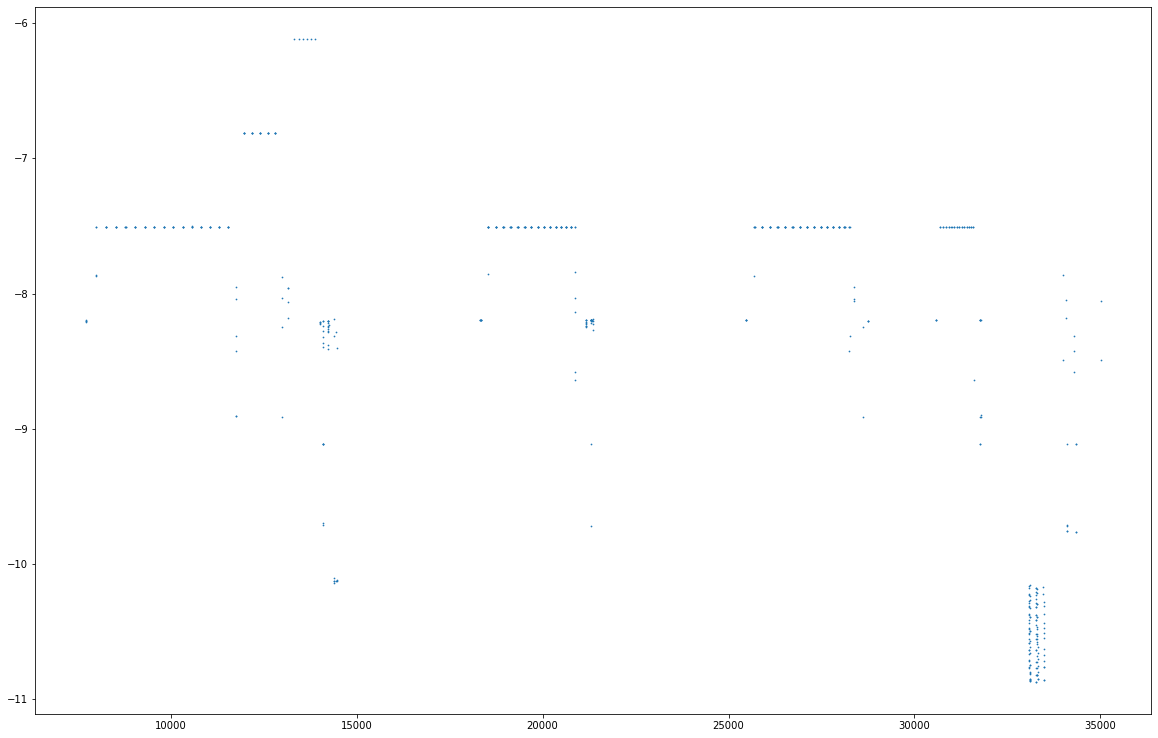

In [ ]:
fig14 = plt.figure(figsize=(20,13))
ax1_14 = fig14.add_subplot(111)
ax1_14.scatter(idx, np.log(naechste), s=0.5)

[  0   0   0 ... 514 514 514]
(515, 516)


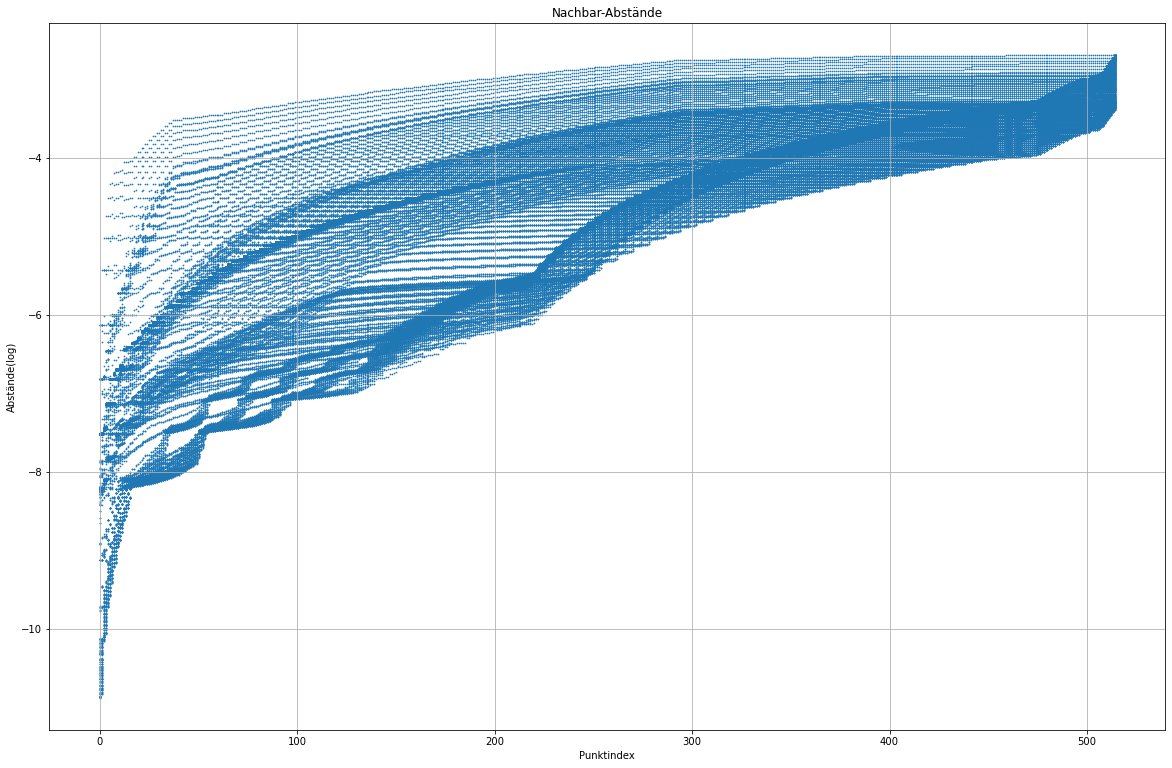

In [ ]:

# x: Punktindex
x_index = np.arange(dist_sorted.shape[0]) # [0.....515]  (516,)
x_index_m = np.tile(x_index, (dist_sorted.shape[1],1)).T
x_werte = x_index_m.flatten()
print(x_index_m.flatten())
print(x_index_m.shape)

# y: Nachbar-Abstände, logarithmisch skaliert
y_werte = np.log(dist_sorted.flatten())

#print(x_index)


plt.figure(1,figsize=(20,13))
#min_dist = np.nanmin(distances, axis=1)
plt.scatter(x_werte, y_werte, s=0.5)
plt.title("Nachbar-Abstände")
plt.xlabel("Punktindex")
plt.ylabel("Abstände(log)")
plt.grid(True)
plt.show()

## 2) Strömungsgeschwindigkeiten

Nun sollen die im Datensatz auftretenden Geschwindigkeiten näher betrachtet werden.

**2.1) Erstellen Sie für einen groben Überblick [Histogramme](https://de.wikipedia.org/wiki/Histogramm) der drei Geschwindgikeitskomponenten.**

  * Sie können hierfür die matplotlib-Funktion [_hist()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) verwenden.
  * Zeichnen Sie die drei Graphen nebeneinander (3 Plots in einer Zeile).
  * Nutzen Sie für die Histogramme je 100 Bins gleichen Umfangs.
  * Wie groß ist die höchste Geschwindigkeit in $x$-Richtung?

In [ ]:
u.shape

(35267,)

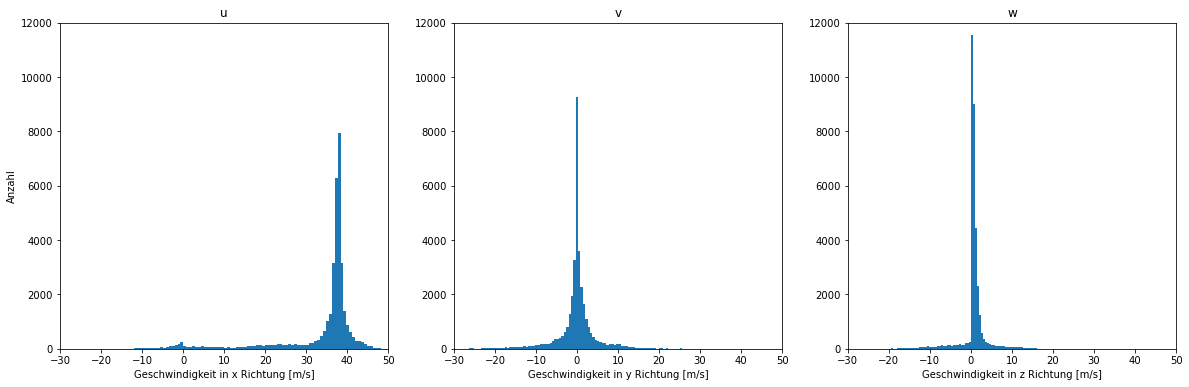

In [ ]:
fig21 = plt.figure(figsize=(20,6))

# drei Graphen nebeneinander zeichnen

ax1_21 = fig21.add_subplot(1,3,1) # 1 Zeile, 3 Spalte, ax1 ist erste davon
ax1_21.hist(u,bins=100) # je 100 Bins gleichen Umfangs nutzen
ax1_21.set_title("u")
ax1_21.set_xlim([-30,50])
ax1_21.set_ylim([0,12000])
ax1_21.set_ylabel('Anzahl')
ax1_21.set_xlabel('Geschwindigkeit in x Richtung [m/s]')


ax2_21 = fig21.add_subplot(1,3,2)
ax2_21.hist(v,bins=100)
ax2_21.set_title("v")
ax2_21.set_xlim([-30,50])
ax2_21.set_ylim([0,12000])
ax2_21.set_xlabel('Geschwindigkeit in y Richtung [m/s]')

ax3_21 = fig21.add_subplot(1,3,3)
ax3_21.hist(w,bins=100)
ax3_21.set_title("w")
ax3_21.set_xlim([-30,50])
ax3_21.set_ylim([0,12000])
ax3_21.set_xlabel('Geschwindigkeit in z Richtung [m/s]')

#plt.grid(True)
plt.show()

In [ ]:
print(f'die höchste Geschwindigkeit in x-Richtung ist {u.max()} m/s.')
print(f'die höchste Geschwindigkeit in y-Richtung ist {v.max()} m/s.')
print(f'die höchste Geschwindigkeit in z-Richtung ist {w.max()} m/s.')

die höchste Geschwindigkeit in x-Richtung ist 52.5598 m/s.
die höchste Geschwindigkeit in y-Richtung ist 28.5593 m/s.
die höchste Geschwindigkeit in z-Richtung ist 18.0051 m/s.


---------------

**2.2) Visualisieren Sie die Strömung in unterschiedlichen Plotvarianten.**

  * Berechnen Sie die Geschwindigkeitsbeträge (Länge der Geschwindigkeitsvektoren) an den Gitterpunkten.
  * Erzeugen Sie 4 Visualisierungen der Beträge:
      1. mithilfe der [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)-Funktion und Farbskalierung der Werte.
      2. mithilfe der [_tricontourf()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tricontourf.html)-Funktion mit 8, 32 sowie 256 Farblevels (hier ist ausnahmsweise die Verwendung einer Schleife sinnvoll).
  * Zeichnen Sie immer den Zylinderkreis in weißer Farbe mit ein.
  * Fügen Sie jeweils einen [Colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) hinzu, damit die Farben Geschwindigkeitswerten zugeordnet werden können.

In [ ]:
print(u)
print(v)
print(w)

[36.7028 36.7027 36.7032 ... 44.96   44.5054 43.733 ]
[-6.65332e-04 -1.45445e-03 -1.58362e-03 ...  7.59926e+00  8.03618e+00
  8.29009e+00]
[0.00807636 0.00404941 0.00800659 ... 3.37523    2.88212    2.30128   ]


In [ ]:
np.concatenate([u,v,w],axis=0)

array([36.7028 , 36.7027 , 36.7032 , ...,  3.37523,  2.88212,  2.30128])

In [ ]:
A = np.arange(1,5)
B = np.arange(6,10)
C = np.arange(2,6)
np.concatenate([A,B,C],axis=0).reshape(3,-1).T

array([[1, 6, 2],
       [2, 7, 3],
       [3, 8, 4],
       [4, 9, 5]])

Lösung:  
- mit drei Komponenten u,v,w eine Matrix erstellen

In [ ]:
uvw = np.concatenate([u,v,w],axis=0).reshape(3,-1).T #reshape(-1,3) #r
uvw.shape #(35267,3)

(35267, 3)

- die Geschwindigkeitsbeträge berechnen (Länge der Geschwindigkeitsvektoren)

In [ ]:
speed = np.linalg.norm(uvw, axis=1)

In [ ]:
speed, speed.shape

(array([36.70280089, 36.70270025, 36.70320091, ..., 45.72245105,
        45.31685596, 44.57125498]),
 (35267,))

- mithilfe der scatter()-Funktion und Farbskalierung der Werte Visualisierungen erzeugen

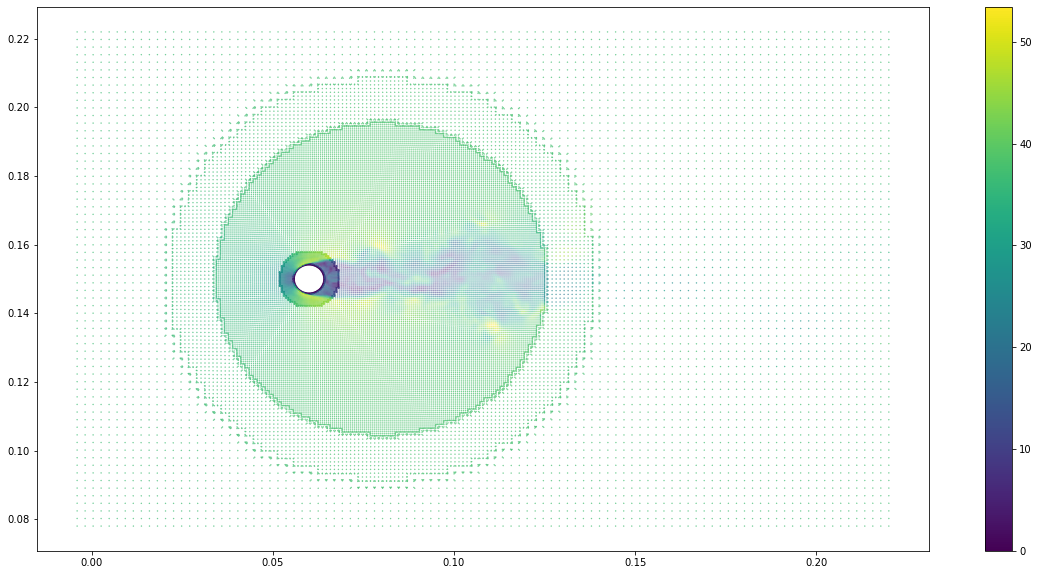

In [ ]:
# plt.figure(5,(20,50))
fig3 = plt.figure(figsize=(20,10))
plt.subplot(111)
# mit scatter() und Farbskalierung der Werte
plt.scatter(x,y, s=0.5, marker=".", c=speed, cmap='viridis')
plot_kreis(col='w')

# Colorbar hinzufügen
c = plt.colorbar()
plt.clim(speed.min(), speed.max())
plt.show()

- mithilfe der tricontourf()-Funktion mit 8, 32 sowie 256 Farblevels Visualisierungen erzeugen

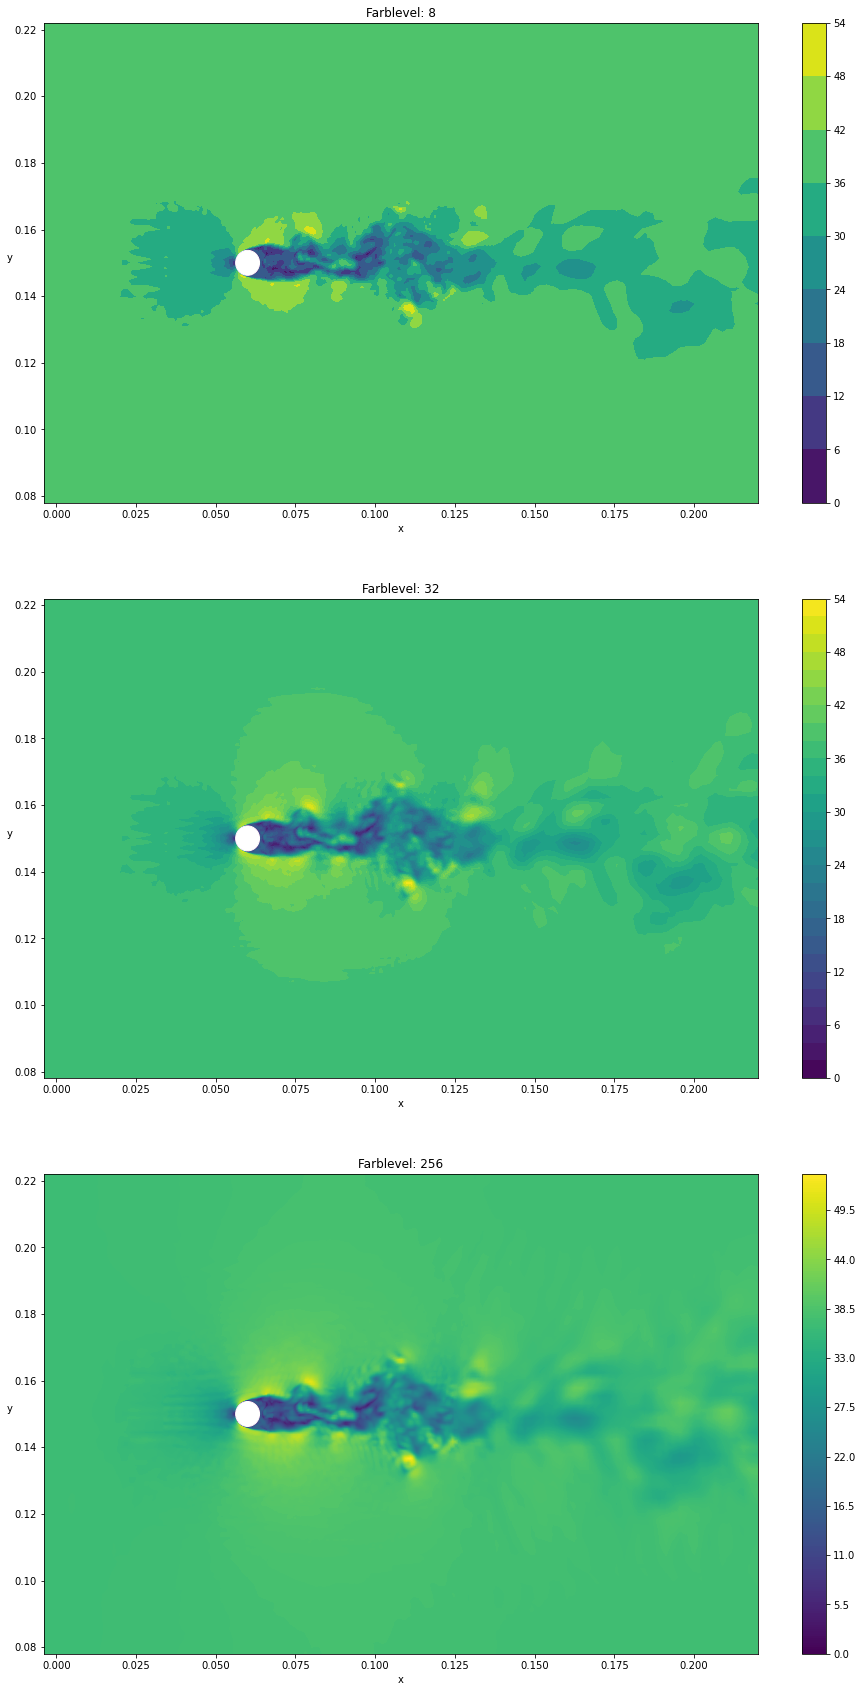

In [ ]:
#fig4 = plt.figure(4,(15,30))
farblevels = [8,32,256]

fig22, axes22 = plt.subplots(3, 1, figsize=(16,30))

for i in range(len(farblevels)):

    plt.subplot(3, 1, i+1)
    plt.tricontourf(x,y,speed, farblevels[i], cmap='viridis')#'viridis'
    plt.colorbar()
    
    # immer den Zylinderkreis in weißer Farbe mit einzeichnen
    plot_kreis(col='w')
    
    plt.title(f"Farblevel: {farblevels[i]}")
    plt.xlabel('x')
    plt.ylabel('y', rotation=0)


## 3) Wirbelstärke

Um "interessante" Regionen in einem Strömungsfeld zu identifizieren, wird häufig die [Wirbelstärke](https://de.wikipedia.org/wiki/Wirbelst%C3%A4rke) verwendet, die nun berechnet werden soll. 
Hier genügt die Berechnung in 2D, d.h. die Wirbelstärke in $z$-Richtung. Diese ist wie folgt definiert:

$$
    \omega_z = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
$$

Offenbar werden die partiellen Ableitungen der Geschwindigkeiten benötigt. 
Diese waren in der Datendatei jedoch nicht enthalten und müssen demzufolge aus verfügbaren Daten berechnet werden. 
Da nur diskrete Werte vorliegen, muss die Ableitung über den [Differenzenquotienten](https://de.wikipedia.org/wiki/Differenzenquotient) erfolgen. 
Dies wäre viel einfacher, wenn die Daten auf einem regelmäßigen rechteckigen Gitter vorliegen würden.

Praktischerweise enthält das SciPy-Modul mit [_griddata()_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) eine Funktion, die unregelmäßige Daten auf ein reguläres Gitter abbilden kann.
Um ein Gitter mit regelmäßigen Abständen zu erzeugen, kann zum Beispiel die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) zusammen mit [_arange()_](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) (beide aus dem NumPy-Modul) verwendet werden.

**3.1) Erzeugen Sie ein Gitter mit regelmäßigen Abständen und interpolieren Sie die unregelmäßig verteilten Geschwindigkeitsdaten auf dieses Gitter.**

  * Das neue Gitter sollte eine Schrittweite von $10^{-4}\,$m haben (sowohl in $x$- als auch in $y$-Richtung) und den Simulationsbereich beinhalten.
  * Interpolieren Sie $u$, $v$ und $w$ jeweils separat, sodass Sie drei neue (große) Arrays erhalten.
  * Zur Überprüfung, ob alles korrekt funktioniert hat, visualisieren Sie den Betrag der neuen Vektoren mithilfe von [_imshow()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
      * Setzen Sie den Parameter `vmax` auf einen sinnvollen Wert.
      * Tragen Sie im Parameter `extent` den tatsächlichen Umfang des Gitters ein.
      * Zeichnen Sie auch hier den weißen Kreis an die passende Position.
  

_Hinweis: Wenn Sie sich der Leistungsfähigkeit Ihres Computers nicht sicher sind, beginnen Sie mit einer gröberen Schrittweite._

------------
Lösung:

In [ ]:
len(X)


35267

In [ ]:
np.max(v)


28.5593

In [ ]:
from scipy.interpolate import griddata 
# Vorschlag für Interpolationsmethode für sanfte Übergänge: "cubic"

# Datenbereich bestimmen
xmin,xmax,ymin,ymax

(-0.004, 0.22, 0.078, 0.222)

In [ ]:
# Das neue Gitter 
# eine Schrittweite von 10^(−4)m (sowohl in x- als auch in y-Richtung) 
# den Simulationsbereich beinhalten
new_x = np.arange(xmin, xmax+0.0001, 0.0001) # 10^(-4)=0.0001
new_y = np.arange(ymin, ymax+0.0001, 0.0001)

In [ ]:
new_x, new_x.shape, new_y, new_y.shape

(array([-0.004 , -0.0039, -0.0038, ...,  0.2198,  0.2199,  0.22  ]),
 (2241,),
 array([0.078 , 0.0781, 0.0782, ..., 0.2218, 0.2219, 0.222 ]),
 (1441,))

In [ ]:
# separate Interpolation von u,v,w -> drei neue (große) Arrays
XX1, YY1 = np.meshgrid(new_x, new_y) # (1441, 2241) 

In [ ]:
new_xy= np.hstack((XX1.copy().reshape(-1,1),YY1.copy().reshape(-1,1)))

In [ ]:
XX1[0].shape,YY1[:,0].shape

((2241,), (1441,))

In [ ]:
XY1 = np.concatenate([x,y],axis=0).reshape(2,-1).T #(35267,2)

In [ ]:
XY1, XY1.shape

(array([[-0.00179253,  0.078     ],
        [-0.004     ,  0.078     ],
        [-0.00179273,  0.0802124 ],
        ...,
        [ 0.0647548 ,  0.15719   ],
        [ 0.064429  ,  0.157339  ],
        [ 0.0640793 ,  0.157265  ]]),
 (35267, 2))

In [ ]:
grid_u = griddata(points=XY1, values=u, xi=(XX1, YY1), method='cubic') #(1441, 2241)
grid_v = griddata(points=XY1, values=v, xi=(XX1, YY1), method='cubic')
grid_w = griddata(points=XY1, values=w, xi=(XX1, YY1), method='cubic')

In [ ]:
grid_u, grid_u.shape,grid_v, grid_v.shape,grid_w, grid_w.shape

(array([[36.7027    , 36.70270504, 36.70270529, ..., 37.1478825 ,
         37.14849137, 37.1491    ],
        [36.70257271, 36.70259071, 36.7026021 , ..., 37.14788213,
         37.14848683, 37.14909411],
        [36.70244068, 36.70247101, 36.70249659, ..., 37.14787683,
         37.14848601, 37.14908834],
        ...,
        [36.69656948, 36.69667011, 36.69677499, ..., 37.11535998,
         37.11558393, 37.11579439],
        [36.69638178, 36.69649689, 36.69662081, ..., 37.11536689,
         37.11558239, 37.11579598],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]),
 (1441, 2241),
 array([[-0.00145445, -0.00143028, -0.00140305, ..., -0.01203564,
         -0.01197308, -0.0119091 ],
        [-0.00138475, -0.00136856, -0.00134727, ..., -0.01239871,
         -0.01234492, -0.0122797 ],
        [-0.00131216, -0.00130517, -0.00129206, ..., -0.01278179,
         -0.01272447, -0.01265099],
        ...,
        [-0.00039989, -0.00030034, -0.0

- zur Überprüfung den Betrag der neuen Vektoren mithilfe von imshow() visualisieren.

In [ ]:
new_uvw = np.concatenate([grid_u,grid_v, grid_w], axis=0).reshape(3,-1).T
new_speed = np.linalg.norm(new_uvw, axis=1)

In [ ]:
new_uvw[3227080:3229280], new_uvw.shape

(array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]),
 (3229281, 3))

In [ ]:
new_speed

array([36.70270025, 36.70270531, 36.70270559, ...,         nan,
               nan,         nan])

- die neu berechnete Geschwindigkeitvektoren enthalten die Werte "nan"s.  

If the points are outside of the convex hull, you cannot get a result other than NaN from griddata using the cubic option.  
If the point is right on the line, then a NaN may result, depending upon what happens in the least significant bits of the computation.  
The issue is that the cubic method uses a triangulation.  
If your point is outside of the convex hull, then the triangulation fails on that point.

In [ ]:
np.max(new_speed)

nan

In [ ]:
np.nanmax(new_speed)

326.2480536794762

In [ ]:
np.min(new_speed)

nan

In [ ]:
np.nanmin(new_speed)

8.893832588702626e-12

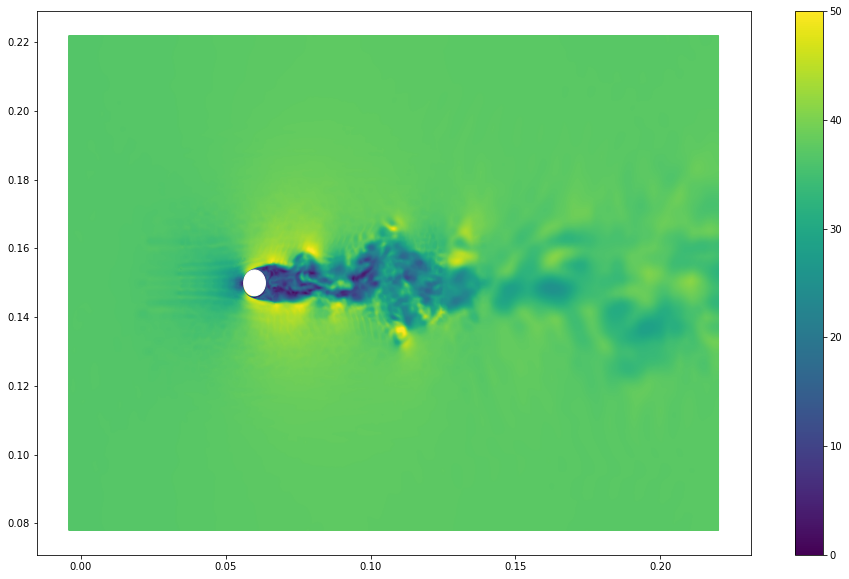

In [ ]:
fig8 = plt.figure(figsize=(16,10))
plt.subplot(111)
# mit scatter() und Farbskalierung der Werte
plt.scatter(new_xy[:,0],new_xy[:,1], s=0.5, marker=".", c=new_speed, cmap='viridis')
plot_kreis(col='w')
plt.colorbar()
#plt.clim(0,50)# new_speed.max()
plt.clim(np.nanmin(new_speed),50)#np.nanmax(new_speed))
# problem: np.nanmax(new_speed) = 326.24!!!
plt.show()

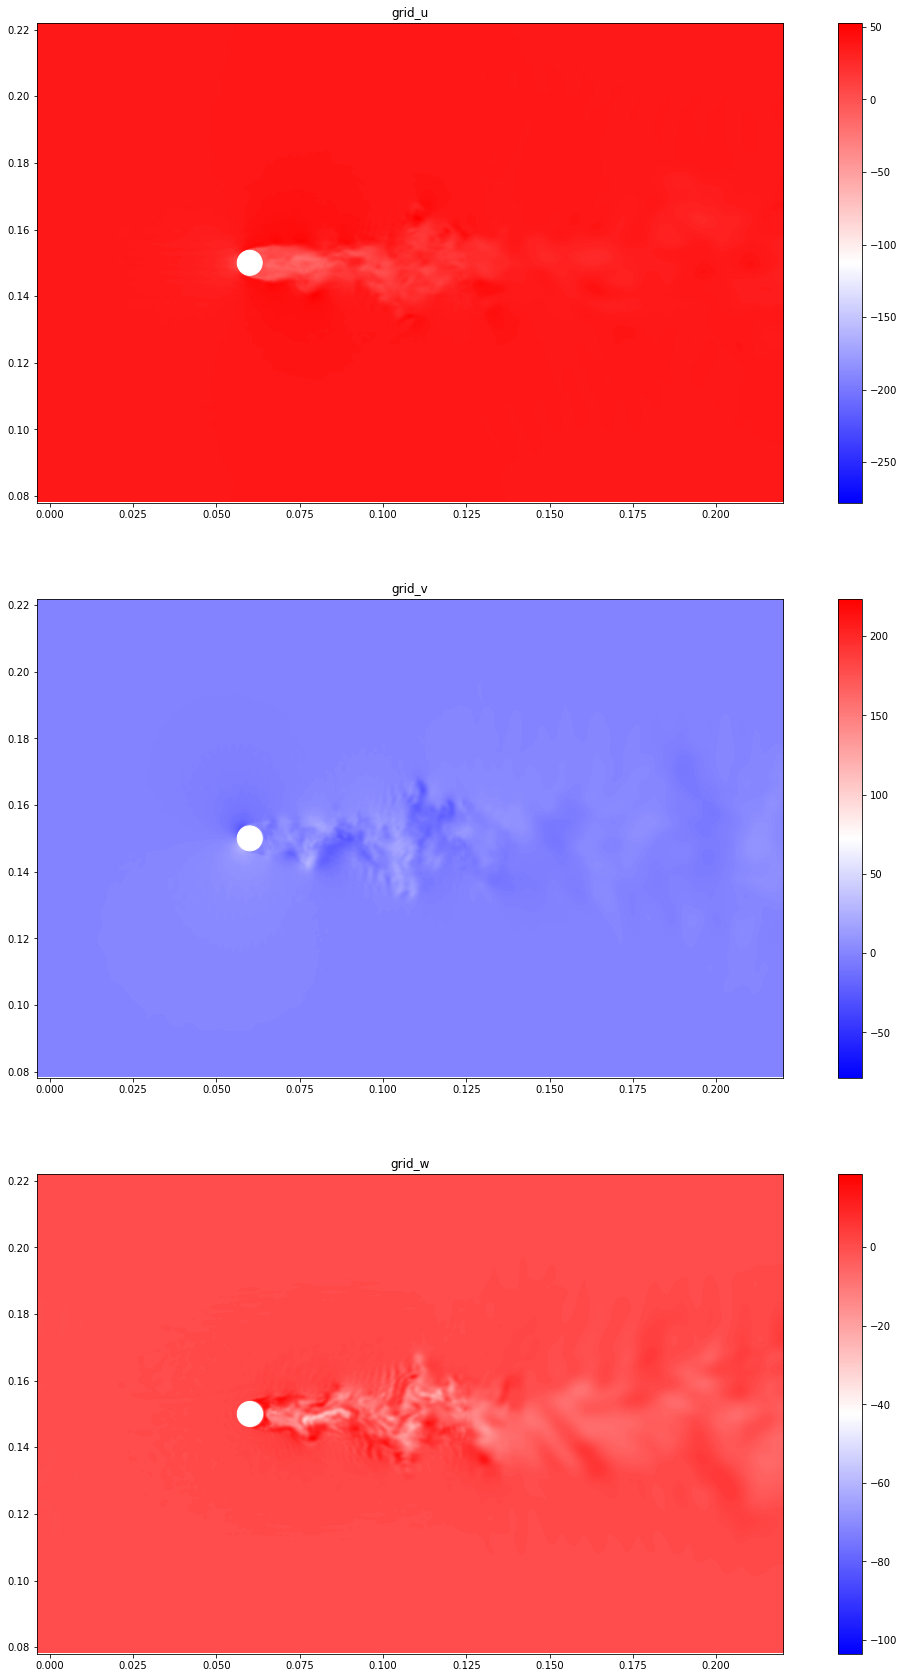

In [ ]:
fig31 = plt.figure(figsize=(20,30))
#extent=(0, 0.25, 0.08, 0.22) # TODO
extent = (np.min(new_x),np.max(new_x),np.min(new_y),np.max(new_y))

ax1_31 = fig31.add_subplot(311)
im1 = ax1_31.imshow(grid_u,cmap='bwr',extent=extent, vmin= np.nanmin(grid_u),vmax=np.nanmax(grid_u))
fig31.colorbar(im1)
ax1_31.set_title("grid_u")
plot_kreis(col='w')

ax2_31 = fig31.add_subplot(312)
im2 = ax2_31.imshow(grid_v,cmap='bwr',extent=extent, vmax=np.nanmax(grid_v))
fig31.colorbar(im2)
ax2_31.set_title("grid_v")
plot_kreis(col='w')

ax3_31 = fig31.add_subplot(313)
im3 = ax3_31.imshow(grid_w,cmap='bwr',extent=extent, vmax=np.nanmax(grid_w))
fig31.colorbar(im3)
ax3_31.set_title("grid_w")
plot_kreis(col='w')

In [ ]:
#plt.imshow(grid_v,cmap='viridis',extent=(xmin, xmax, ymin, ymax), vmax = np.max(grid_v))
#plt.scatter(xy1[:,0], xy1[:,1], s=0.5, marker=".",color='b')
# extent=(left, right, bottom, top)
#plt.show()

#ax5.scatter(xy1[:,0], xy1[:,1], s=0.5, marker=".")

In [ ]:
xy1.shape

(35267, 2)

In [ ]:
u.shape

(35267,)

In [ ]:
grid_u.shape

(1441, 2241)

In [ ]:
new_uvw.shape

(3229281, 3)

In [ ]:
xy.shape

(35267, 2)

In [ ]:
new_x.shape

(2241,)

In [ ]:
xx1.shape

(1441, 2241)

In [ ]:
yy1.shape

(1441, 2241)

In [ ]:
new_x.shape

(2241,)

------------

Mit den nun auf einem regelmäßigen Gitter vorliegenden Daten können die partiellen Ableitungen einfach approximiert werden über

$$
    \frac{\partial v_{i,j}}{\partial x} = \frac{v_{i,j+1}-v_{i,j}}{\Delta x}
$$

und

$$
    \frac{\partial u_{i,j}}{\partial y} = \frac{u_{i+1,j}-u_{i,j}}{\Delta y}~,
$$

mit $i=0\ldots N_\text{Zeilen}-1$, $j=0\ldots N_\text{Spalten}-1$.

**3.2) Berechnen Sie die Ableitungen und die Wirbelstärken $\omega_z$ entsprechend obiger Gleichungen. Visualisieren Sie die Wirbelstärken mit _imshow()_.**

  * Wählen Sie eine divergierende [Colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) und stellen Sie sicher, dass der Wert 0 darin weiß dargestellt wird.
  * Zeichnen Sie auch hier den weißen Zylinderkreis ein.
  * Setzen Sie den dargestellten Wertebereich so, dass der Plot informativ ist.
  * Fügen Sie einen Colorbar hinzu.

_Hinweis: Versuchen Sie, effizienten Code zu schreiben! Diese Berechnung sollte nicht allzu lange dauern (vielleicht einige wenige Sekunden). Erhöhen Sie zu Testzwecken die Schrittweite, falls erforderlich._

-------------

Lösung:

In [ ]:
grid_v_no_nan = grid_v[:-1]

In [ ]:
grid_v1 = np.roll(grid_v_no_nan, -1, axis=1)

In [ ]:
grid_u_no_nan = grid_u[:-1]

In [ ]:
grid_u1 = np.roll(grid_u_no_nan, -1,axis=0)

In [ ]:
np.isnan(grid_u[:-1]).shape


(1440, 2241)

In [ ]:
delta_x = 0.0001
delta_y = 0.0001

delta_v = grid_v1 - grid_v[:-1]
delta_u = grid_u1 - grid_u[:-1]

omega_z = (delta_v / delta_x) - (delta_u / delta_y)

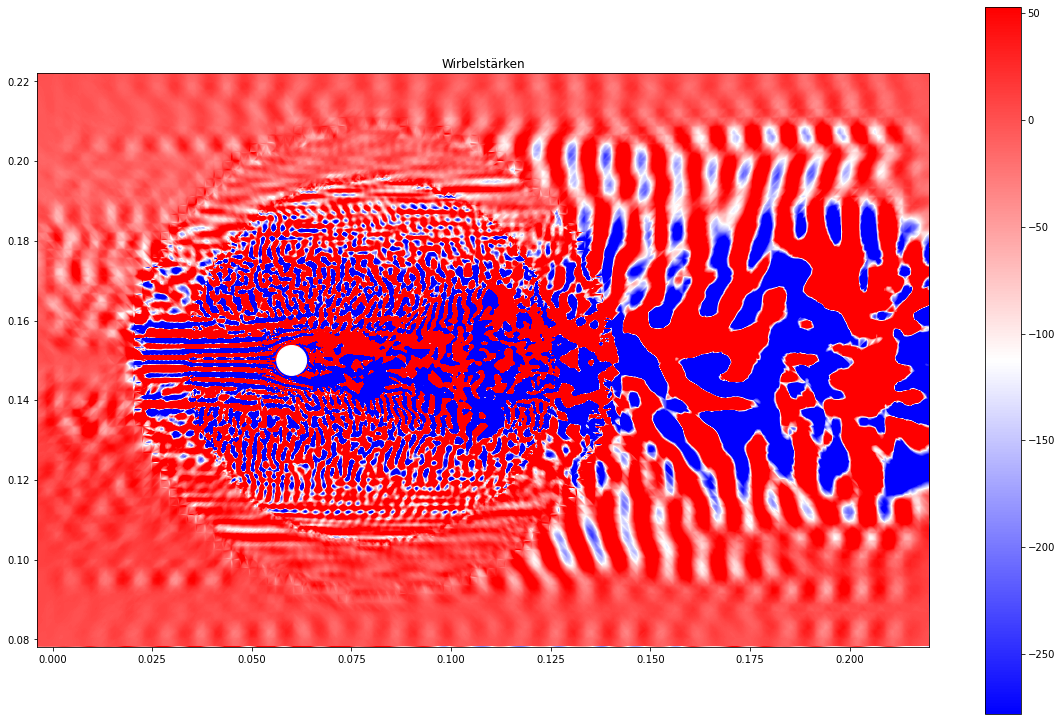

In [ ]:
fig32 = plt.figure(figsize=(20,13))
ax1_32 = fig32.add_subplot(111)
im4 = ax1_32.imshow(omega_z, cmap='bwr',extent=extent, vmin= np.nanmin(grid_u),vmax=np.nanmax(grid_u))


fig32.colorbar(im4)
ax1_32.set_title("Wirbelstärken")
plot_kreis(col='w')


In [ ]:
np.where(np.isnan(grid_u[0]))

(array([], dtype=int64),)